# 生成数据集

In [1]:
import os
import h5py as hf
import numpy as np

os.makedirs('datasets/synth/', exist_ok=True)

平面-比例差异

In [2]:
from gen_dataset import *

n_samples = 1500

make_plane_prop(f'datasets/synth/plane_prop_{n_samples}.h5', n_samples=n_samples)

with hf.File(f'datasets/synth/plane_prop_{n_samples}.h5', 'r') as f:
    fig = plt.figure()
    plot = fig.add_subplot(projection='3d')
    X = f['E']['X3']
    Xt = f['O']['X3']
    plot.scatter(X[:,0], X[:,1], X[:,2], s=2, c = 'blue')
    plot.scatter(Xt[:,0], Xt[:,1], Xt[:,2], s=2, c = 'red')
    plt.show()

平面-分布差异

In [3]:
from gen_dataset import *

n_samples = 1500

make_plane_dist(f'datasets/synth/plane_dist_{n_samples}.h5', n_samples=n_samples)

with hf.File(f'datasets/synth/plane_dist_{n_samples}.h5', 'r') as f:
    fig = plt.figure()
    plot = fig.add_subplot(projection='3d')
    X = f['E']['X3']
    Xt = f['O']['X3']
    plot.scatter(X[:,0], X[:,1], X[:,2], s=2, c = 'blue')
    plot.scatter(Xt[:,0], Xt[:,1], Xt[:,2], s=2, c = 'red')
    plt.show()

瑞士卷-比例差异

In [ ]:
from gen_dataset import *

n_samples = 1500

make_swissroll_prop(f'datasets/synth/swissroll_prop_{n_samples}.h5', n_samples=n_samples, k=0.8,u=1.5)

with hf.File(f'datasets/synth/swissroll_prop_{n_samples}.h5', 'r') as f:
    fig = plt.figure()
    plot = fig.add_subplot(projection='3d')
    X = f['E']['X1']
    Xt = f['O']['X1']
    plot.scatter(X[:,0], X[:,1], X[:,2], s=2, c = 'blue')
    plot.scatter(Xt[:,0], Xt[:,1], Xt[:,2], s=2, c = 'red')
    plt.show()


瑞士卷-分布差异

In [ ]:
from gen_dataset import *

n_samples = 1500

make_swissroll_dist(f'datasets/synth/swissroll_dist_{n_samples}.h5', n_samples=n_samples, k=0.8, u=1.5)

with hf.File(f'datasets/synth/swissroll_dist_{n_samples}.h5', 'r') as f:
    fig = plt.figure()
    plot = fig.add_subplot(projection='3d')
    X = f['E']['X1']
    Xt = f['O']['X1']
    plot.scatter(X[:,0], X[:,1], X[:,2], s=2, c = 'blue')
    plot.scatter(Xt[:,0], Xt[:,1], Xt[:,2], s=2, c = 'red')
    plt.show()


平面-分布差异2（正交基采样）

In [ ]:
import numpy as np
from numpy.random import mtrand

o = np.array([0.0, 0.0, 0.0])
n = np.array([-0.5, 0.5, 0.1])
# 给定一个平面上的点
p = np.array([1.0, 1.0, 0.0])

# 计算平面一点z
def plane_eq(x, y):
    return -(n[0] * (x - o[0]) + n[1] * (y - o[1])) / n[2] + o[2]

p[2] = plane_eq(p[0], p[1])

p = p / np.linalg.norm(p)

# 计算点的正交基
q = np.cross(n, p)
q = q / np.linalg.norm(q)

print(p, q)

# 生成一个二维均匀分布的点集
n_samples = 1000
np.random.seed(0)
generator = mtrand._rand
S = generator.uniform(size=(1000, 2))

X = S[:, 0, np.newaxis] * p + S[:, 1, np.newaxis] * q

import matplotlib.pyplot as plt

fig = plt.figure()
plot = fig.add_subplot(projection='3d')
plot.scatter(X[:,0],X[:,1],X[:,2])
plt.show()


Building KNN index


100%|██████████| 1000/1000 [00:00<00:00, 278192.21it/s]


Extracting KNN neighbours


100%|██████████| 1000/1000 [00:00<00:00, 4482.19it/s]


Training neural network
Epoch 1/1000
10/10 [==============================] - 1s 3ms/step - loss: 0.6783
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.2945
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1904
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1883
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1440
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1198
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1436
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1161
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0940
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0618
E

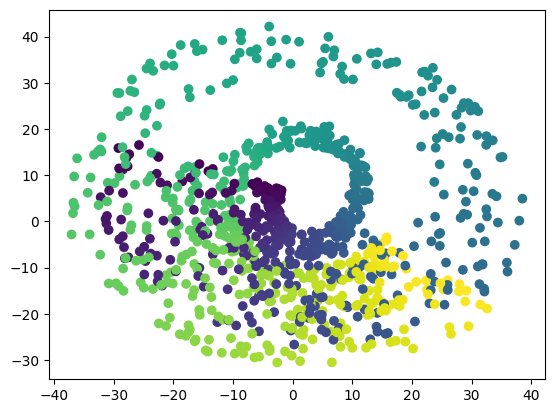

In [17]:
from ivis import Ivis
import numpy as np
from sklearn.datasets import make_swiss_roll, make_moons

X, y = make_swiss_roll(n_samples=1000, noise=0.2, hole=True)

# X = np.random.rand(1000, 768)
model = Ivis(embedding_dims=2,
             k=15,
             batch_size=int(X.shape[0] / 10),
             epochs=1000,
             verbose=1)

model.fit(X)

proj = model.transform(X)

import matplotlib.pyplot as plt
plt.scatter(proj[:,0], proj[:,1], c=y)
plt.show()


In [8]:
import pandas as pd

df = pd.read_csv("./results/2024.09.21-20.40.02/results.csv")

print(df)

print(pd.unique(df['diff']))
print(pd.unique(df['manifold']))


    method metric manifold       diff  stage    result
0      pca      t    plane  structure      0  0.997936
1      pca      c    plane  structure      0  0.999178
2      pca     ns    plane  structure      0  0.000039
3      pca    shp    plane  structure      0  0.999940
4      pca    sil    plane  structure      0  0.657894
..     ...    ...      ...        ...    ...       ...
163    pca    shp   hybrid       prop      3  0.998687
164    pca    sil   hybrid       prop      3 -0.018375
165    pca    dsc   hybrid       prop      3  0.404286
166    pca     nh   hybrid       prop      3  0.617755
167    pca    ale   hybrid       prop      3  0.003484

[168 rows x 6 columns]
['structure' 'dist' 'prop']
['plane' 'swissroll' 'hybrid']


2/2 [==============================] - 0s 3ms/step


NameError: name 'proj' is not defined

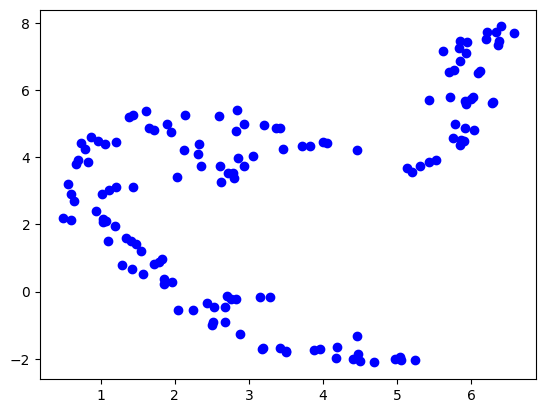

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_swiss_roll
import numpy as np
from methods.methods import Methods
import matplotlib.pyplot as plt
from methods.dlmp import train_model
from umap import UMAP

n_samples = 200

X, _ = make_swiss_roll(n_samples=n_samples, noise=0.1, hole=False)
X_train, X_test = train_test_split(X, test_size=0.3)

methods_name = [
    # 'pca',
    # 'ae',
    # 'cdr',

    # 'oos-mds',
    # 'lmds',
    # 'kmds',
    # 'mimds',

    # 'oos-isomap',
    # 'lisomap',
    # 'kisomap',

    # 'ktsne',
    # 'ptsne',
    # 'ptsne22',
    'dlmp-tsne',
    
    # 'pumap',
    'dlmp-umap',
]

methods = Methods()

# for method_idx, method_name in enumerate(methods_name):

#     method = methods.get(method_name)
#     method.fit(X_train)
#     proj_org = method.transform(X_train)
#     proj = method.transform_oos(X_test)

#     print(proj)

#     plt.scatter(proj_org[:,0], proj_org[:,1], c='blue')
#     plt.scatter(proj[:,0], proj[:,1], c='red')
#     plt.show()

proj_org = UMAP(n_components=2, n_neighbors=15).fit_transform(X_train)

model, _ = train_model(X_train, proj_org, epochs=1000)
model.predict(X_test)

plt.scatter(proj_org[:,0], proj_org[:,1], c='blue')
plt.scatter(proj[:,0], proj[:,1], c='red')
plt.show()



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from methods.dlmp import train_model
from umap import UMAP
import h5py as hf

std = StandardScaler()

n_samples = 1000
X, _ = make_swiss_roll(n_samples=n_samples, noise=0.5, hole=False)
X_train, X_test = train_test_split(X, test_size=0.5)
X_train = std.fit_transform(X_train)

# with hf.File(f'org_datasets/fashionmnist/fashionmnist_6000.h5', 'r') as hfile:
#     X = np.array(hfile['x'])
#     X_train, X_test = train_test_split(X, test_size=0.3)
#     X_train = std.fit_transform(X_train)

print("start fit")

proj_org = UMAP(n_components=2, n_neighbors=10, min_dist=0.1).fit_transform(X_train)
scaler = MinMaxScaler()
proj_org = scaler.fit_transform(proj_org)
print("start train")

model, _ = train_model(X_train, proj_org, verbose=True, lr=1e-3, batch_size=int(X_train.shape[0] / 10 if X_train.shape[0]> 256 else X_train.shape[0]))

print("start projecting")


KeyboardInterrupt: 

16/16 [==============================] - 0s 1ms/step
[[0.2698946  0.02323733]
 [0.20084631 0.97616076]
 [0.65387213 0.55920166]
 [0.20930094 0.7625719 ]
 [0.63892365 0.7682365 ]
 [0.2873591  0.12490526]
 [0.879093   0.30223146]
 [0.93313974 0.44914863]
 [0.58191377 0.7624112 ]
 [0.25203514 0.9551905 ]
 [0.38709593 0.38452485]
 [0.19624215 0.26970038]
 [0.02471863 0.7422612 ]
 [0.6453566  0.83776623]
 [0.17777957 0.11079267]
 [0.3696339  0.18066184]
 [0.28232807 0.07415485]
 [0.7237759  0.3988445 ]
 [0.9327497  0.5037092 ]
 [0.24055135 0.15872505]
 [0.47455746 0.8300111 ]
 [0.8474601  0.6541051 ]
 [0.15727286 0.98586804]
 [0.3502238  0.855722  ]
 [0.18523774 0.22236738]
 [0.23535438 0.54413605]
 [0.98096806 0.61022466]
 [0.7211348  0.57583493]
 [0.54138136 0.88614845]
 [0.46995118 0.90544575]
 [0.11880947 0.970787  ]
 [0.22625601 0.85498476]
 [0.72321    0.80177593]
 [0.254673   0.05489649]
 [0.35253197 0.9134827 ]
 [0.90445817 0.5342132 ]
 [0.28353563 0.6709161 ]
 [0.27447435 0.1457567

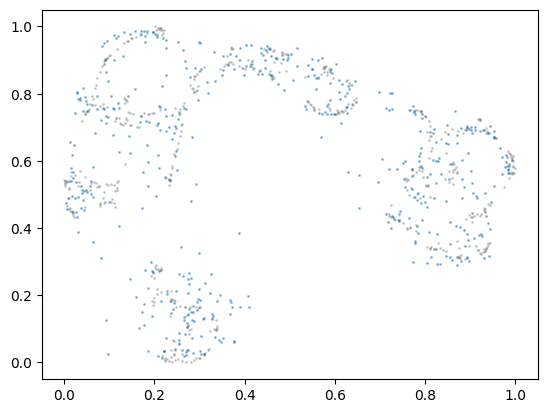

In [2]:
X_test = std.transform(X_test)
proj = model.predict(X_test)

print(proj)

plt.scatter(proj_org[:,0], proj_org[:,1], s=1.3, c='gray', alpha=0.3)
plt.scatter(proj[:,0], proj[:,1], s=1.3, alpha=0.4)
plt.show()


Restoring model weights from the end of the best epoch: 49.
Epoch 59: early stopping
[[0.6947137  0.37036058]
 [0.78247446 0.7372225 ]
 [0.58217716 0.8726966 ]
 ...
 [0.84723717 0.28611258]
 [0.40779132 0.3262102 ]
 [0.2600532  0.3093852 ]]


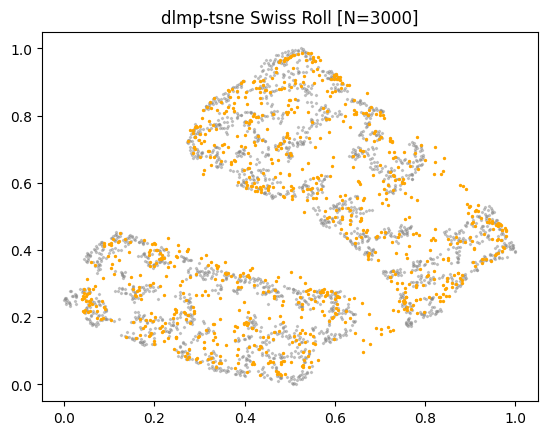

Restoring model weights from the end of the best epoch: 52.
Epoch 62: early stopping
[[0.4775808  0.7107563 ]
 [0.22374743 0.6252635 ]
 [0.12118492 0.2992497 ]
 ...
 [0.6159074  0.8751134 ]
 [0.7636515  0.4363032 ]
 [0.85750043 0.3077657 ]]


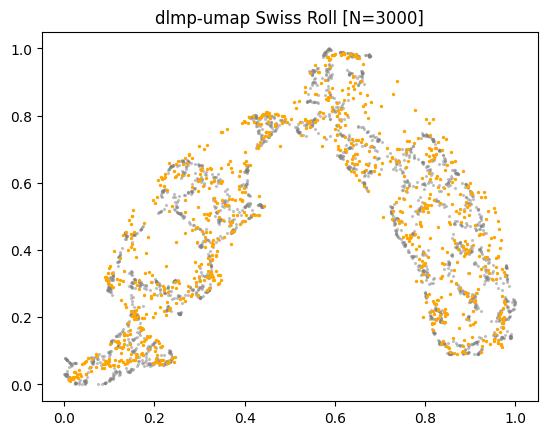

In [3]:
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from methods.methods import Methods

n_samples = 3000
X, y = make_swiss_roll(n_samples=n_samples, noise=0.1, hole=False)
X_train, X_test = train_test_split(X, test_size=0.3)

me = Methods()

m = me.get('dlmp-tsne')
m.fit(X_train)
X_train2d = m.transform(X_train)
X_2d = m.transform_oos(X_test)

print(X_2d)

import matplotlib.pyplot as plt
plt.scatter(X_train2d[:, 0], X_train2d[:, 1], c='gray', alpha=0.5, marker='x',s=2, label='train')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='orange', marker='o',s=2, label='test')
plt.title(f"dlmp-tsne Swiss Roll [N={n_samples}]")
plt.show()

m = me.get('dlmp-umap')
m.fit(X_train)
X_train2d = m.transform(X_train)
X_2d = m.transform_oos(X_test)

print(X_2d)


plt.scatter(X_train2d[:, 0], X_train2d[:, 1], c='gray', alpha=0.5, marker='x',s=2, label='train')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='orange', marker='o',s=2, label='test')
plt.title(f"dlmp-umap Swiss Roll [N={n_samples}]")
plt.show()



[2.2958450216584675e-49 0.001142098857003247 0.008987455040201235
 0.02950849718747372 0.06728835323306176 0.12499999999999992
 0.20307481014556647 0.2995937061754068 0.4104123060349274
 0.5295084971874737 0.6495190528383289 -- -- -- -- -- -- -- -- --
 0.6495190528383291 0.5295084971874737 0.4104123060349278
 0.299593706175407 0.20307481014556647 0.12500000000000025
 0.06728835323306184 0.02950849718747372 0.008987455040201264
 0.0011420988570032544 2.2958450216584675e-49]


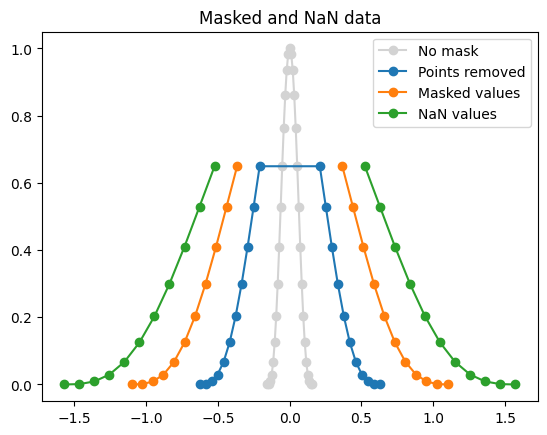

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

print(y3)

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()

2024-09-22 22:50:04,303 - INFO - Start train for Visualize
2024-09-22 22:50:04,405 - INFO - successfully compute approximate neighbor_graph
2024-09-22 22:50:06,975 - INFO - Start Training for 1000 Epochs
2024-09-22 22:50:06,975 - INFO - Experiment Configurations: 
Epochs: 1000 Batch Size: 210 
Learning rate: 0.001000 Optimizer: adam

2024-09-22 22:50:06,976 - INFO - Start Training for 1000 Epochs
2024-09-22 22:50:31,104 - INFO - Epoch 100/1000, Train Loss: 1.97672, 
2024-09-22 22:50:55,228 - INFO - Epoch 200/1000, Train Loss: 1.94899, 
2024-09-22 22:51:20,305 - INFO - Epoch 300/1000, Train Loss: 2.02585, 
2024-09-22 22:51:45,992 - INFO - Epoch 400/1000, Train Loss: 2.00787, 
2024-09-22 22:52:11,895 - INFO - Epoch 500/1000, Train Loss: 2.02128, 
2024-09-22 22:52:40,364 - INFO - Epoch 600/1000, Train Loss: 2.01231, 
2024-09-22 22:53:07,205 - INFO - Epoch 700/1000, Train Loss: 2.00986, 
2024-09-22 22:53:33,858 - INFO - Epoch 800/1000, Train Loss: 1.98254, 
2024-09-22 22:53:59,306 - INFO -

Indexing
2024-09-22 22:54:26.565835: Beginning training for 1000 epochs
2024-09-22 22:54:26.808405: Loss after epoch 1: 16.400791491212143
2024-09-22 22:54:27.019917: Loss after epoch 2: 13.483545810531862
2024-09-22 22:54:27.107512: Loss after epoch 3: 12.974993775720911
2024-09-22 22:54:27.188512: Loss after epoch 4: 11.983647693432046
2024-09-22 22:54:27.274074: Loss after epoch 5: 11.697169727533772
2024-09-22 22:54:27.375665: Loss after epoch 6: 11.371845388248822
2024-09-22 22:54:27.449666: Loss after epoch 7: 11.341786425462004
2024-09-22 22:54:27.514663: Loss after epoch 8: 11.116412608986149
2024-09-22 22:54:27.577665: Loss after epoch 9: 11.061411098731401
2024-09-22 22:54:27.663666: Loss after epoch 10: 10.591305616788603
2024-09-22 22:54:27.753667: Loss after epoch 11: 10.325326148915446
2024-09-22 22:54:27.833667: Loss after epoch 12: 9.846007319933817
2024-09-22 22:54:27.897664: Loss after epoch 13: 9.545650713822868
2024-09-22 22:54:27.959266: Loss after epoch 14: 9.6183

Text(0.5, 1.0, 'PTSNE')

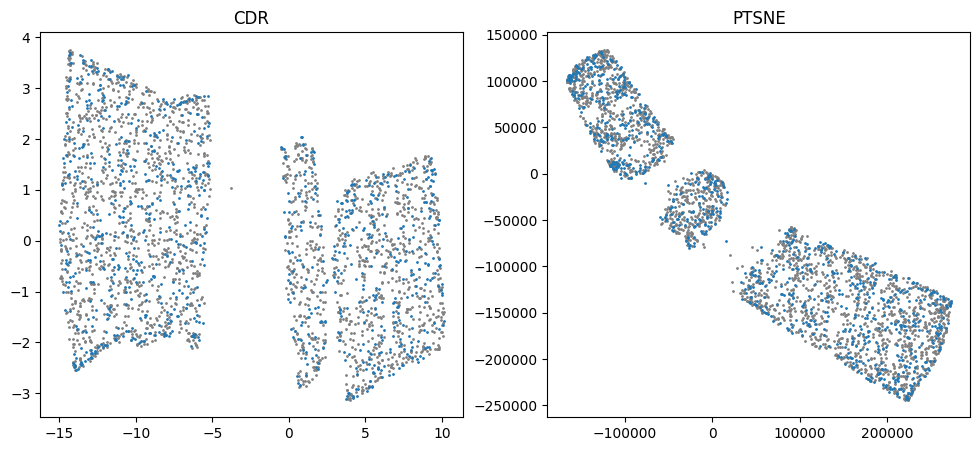

In [3]:

from methods.methods import Methods
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, _ = make_swiss_roll(n_samples=3000, noise=0.1)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

methods = Methods(verbose=True)

m = methods.get('cdr')
m.fit(X_train)
y_train = m.transform(X_train)
y_test = m.transform_oos(X_test)

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
ax.scatter(y_train[:, 0], y_train[:, 1], s=1, c='gray')
ax.scatter(y_test[:, 0], y_test[:, 1], s=1)
ax.set_title('CDR')

m = methods.get('ptsne')
m.fit(X_train)
y_train = m.transform(X_train)
y_test = m.transform_oos(X_test)

ax = fig.add_subplot(122)
ax.scatter(y_train[:, 0], y_train[:, 1], s=1, c='gray')
ax.scatter(y_test[:, 0], y_test[:, 1], s=1)
ax.set_title('PTSNE')


Indexing
2024-09-23 07:34:33.025196: Beginning training for 1000 epochs
2024-09-23 07:34:33.251770: Loss after epoch 1: 25.218547630391544
2024-09-23 07:34:33.322292: Loss after epoch 2: 17.187572696801205
2024-09-23 07:34:33.372292: Loss after epoch 3: 16.43219156377451
2024-09-23 07:34:33.422266: Loss after epoch 4: 15.59224247105874
2024-09-23 07:34:33.473275: Loss after epoch 5: 14.801659426589021
2024-09-23 07:34:33.527973: Loss after epoch 6: 14.646229275319236
2024-09-23 07:34:33.578985: Loss after epoch 7: 14.55627248427492
2024-09-23 07:34:33.629988: Loss after epoch 8: 14.256179542862993
2024-09-23 07:34:33.679987: Loss after epoch 9: 13.910153607989304
2024-09-23 07:34:33.732986: Loss after epoch 10: 13.747041767612501
2024-09-23 07:34:33.787428: Loss after epoch 11: 14.141536412125411
2024-09-23 07:34:33.844417: Loss after epoch 12: 13.642564466853154
2024-09-23 07:34:33.896230: Loss after epoch 13: 13.384275029562865
2024-09-23 07:34:33.949229: Loss after epoch 14: 13.7103

2024-09-23 07:35:25,274 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


Trying to put X into GPU
optimizing...


Processing epoch 1000/1000 loss : -0.03322 time : 0.00397s: 100%|██████████| 1000/1000 [00:45<00:00, 21.98it/s]


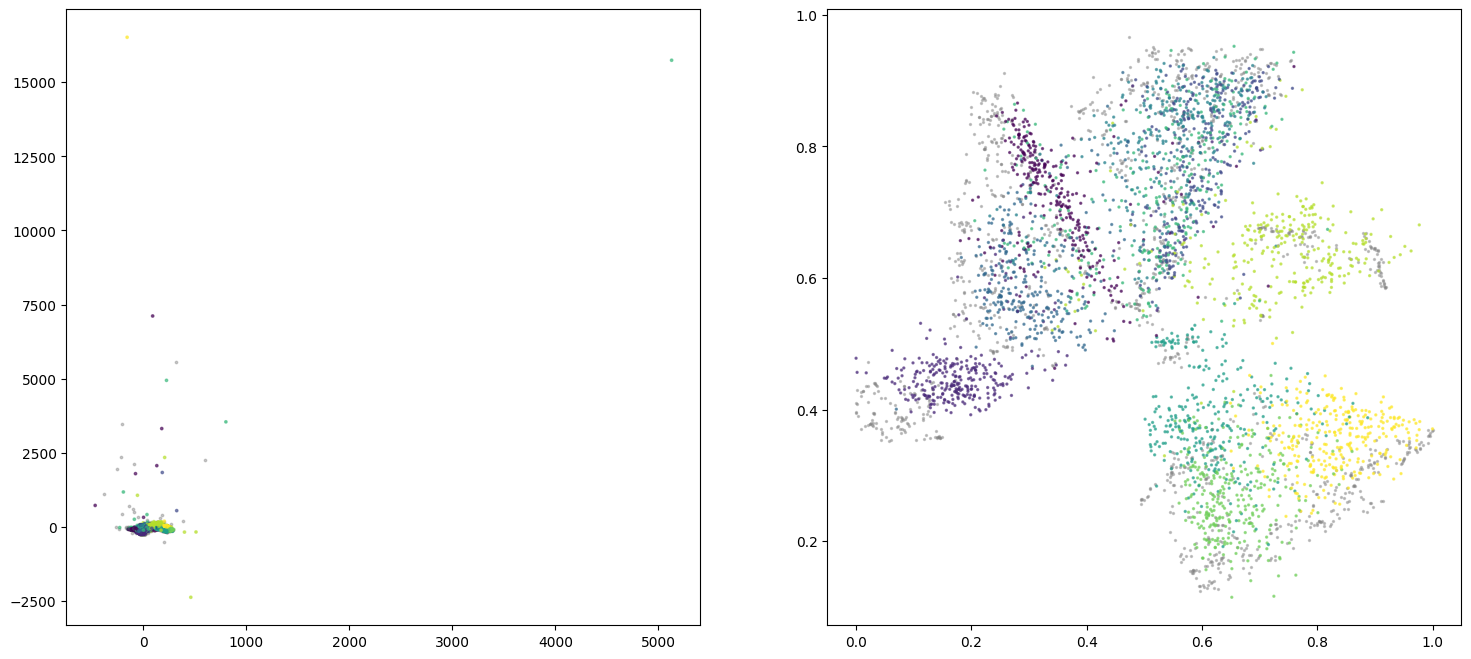

In [3]:
from methods.methods import Methods
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

with h5.File(f'datasets/truth/fashionMNIST_4200.h5', 'r') as f:

    X_train = np.array(f['E']['X0'])
    X_test = np.array(f['O']['X0'])
    y_train = np.array(f['E']['y0'])
    y_test = np.array(f['O']['y0'])

methods = Methods(verbose=True)

m = methods.get('ptsne')
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(121)
ax.scatter(p_train[:, 0], p_train[:, 1], s=3, c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=3, c=y_test, alpha=0.6)

m = methods.get('ptsne22')
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

ax = fig.add_subplot(122)
ax.scatter(p_train[:, 0], p_train[:, 1], s=2,  c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=2,  c=y_test, alpha=0.6)


Indexing
2024-09-23 07:41:48.581055: Beginning training for 1000 epochs
2024-09-23 07:41:49.453670: Loss after epoch 1: 25.218547630391544
2024-09-23 07:41:49.539670: Loss after epoch 2: 17.187572696801205
2024-09-23 07:41:49.613670: Loss after epoch 3: 16.43219156377451
2024-09-23 07:41:49.664671: Loss after epoch 4: 15.59224247105874
2024-09-23 07:41:49.716780: Loss after epoch 5: 14.801659426589021
2024-09-23 07:41:49.766783: Loss after epoch 6: 14.646229275319236
2024-09-23 07:41:49.815782: Loss after epoch 7: 14.55627248427492
2024-09-23 07:41:49.865784: Loss after epoch 8: 14.256179542862993
2024-09-23 07:41:49.918784: Loss after epoch 9: 13.910153607989304
2024-09-23 07:41:49.968782: Loss after epoch 10: 13.747041767612501
2024-09-23 07:41:50.018784: Loss after epoch 11: 14.141536412125411
2024-09-23 07:41:50.070783: Loss after epoch 12: 13.642564466853154
2024-09-23 07:41:50.124784: Loss after epoch 13: 13.384275029562865
2024-09-23 07:41:50.179351: Loss after epoch 14: 13.7103

Epoch [300/300]: 100%|██████████| 300/300 [01:22<00:00,  3.64it/s, loss=Avg Loss0.0009]

Training time: 0:01:22.343737


Text(0.5, 1.0, 'PTSNE09 - new')

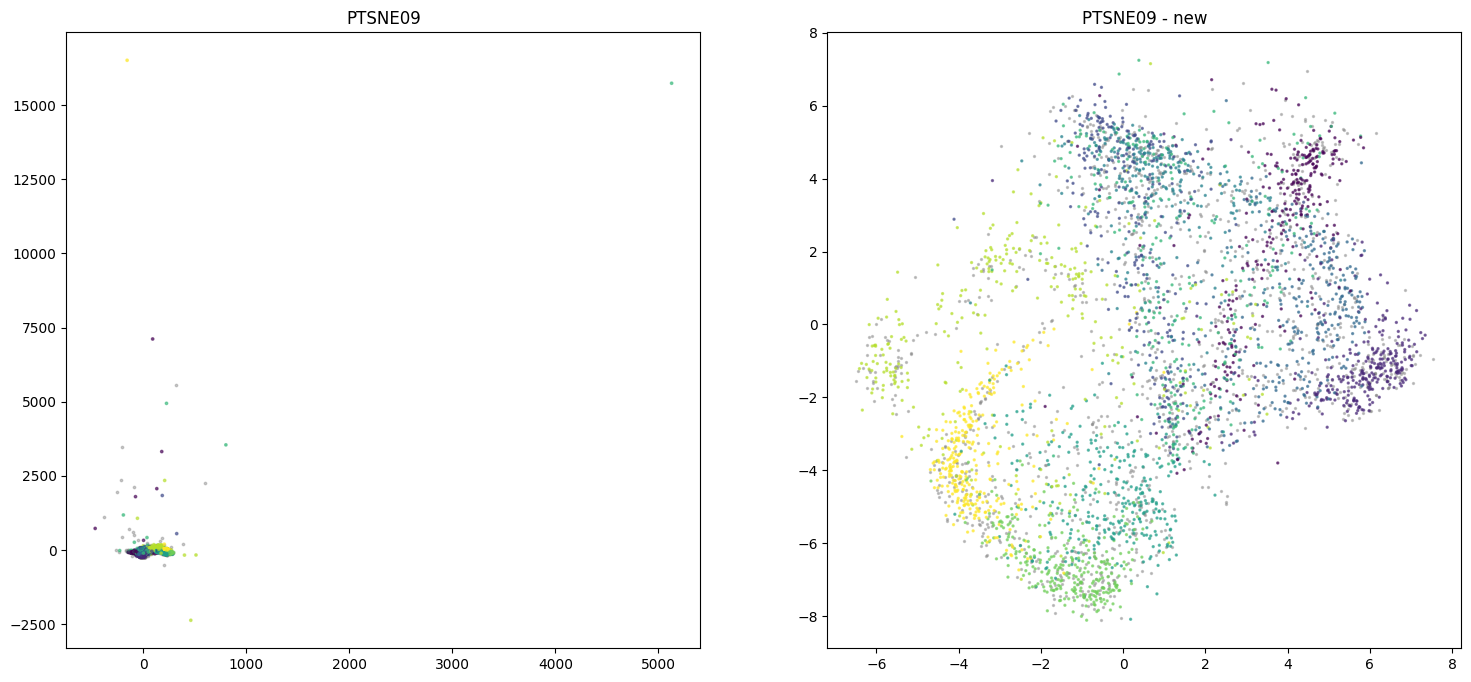

In [1]:
from methods.methods import Methods, _ptsne_new, Parameters
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

with h5.File(f'datasets/truth/fashionMNIST_4200.h5', 'r') as f:

    X_train = np.array(f['E']['X0'])
    X_test = np.array(f['O']['X0'])
    y_train = np.array(f['E']['y0'])
    y_test = np.array(f['O']['y0'])

methods = Methods(verbose=True)

m = methods.get('ptsne')
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(121)
ax.scatter(p_train[:, 0], p_train[:, 1], s=3, c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=3, c=y_test, alpha=0.6)
ax.set_title('PTSNE09')

m = _ptsne_new(Parameters(), verbose=True)
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

ax = fig.add_subplot(122)
ax.scatter(p_train[:, 0], p_train[:, 1], s=2,  c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=2,  c=y_test, alpha=0.6)
ax.set_title('PTSNE09 - new')

Indexing
2024-09-23 07:48:38.534217: Beginning training for 1000 epochs
2024-09-23 07:48:38.706218: Loss after epoch 1: 21.557090494168836
2024-09-23 07:48:38.836308: Loss after epoch 2: 10.720379108150574
2024-09-23 07:48:38.890385: Loss after epoch 3: 11.18598311272803
2024-09-23 07:48:38.943836: Loss after epoch 4: 10.852953702401825
2024-09-23 07:48:38.996565: Loss after epoch 5: 10.700933448972606
2024-09-23 07:48:39.048294: Loss after epoch 6: 11.490443285499243
2024-09-23 07:48:39.099292: Loss after epoch 7: 10.909673466958845
2024-09-23 07:48:39.150292: Loss after epoch 8: 10.609675397093536
2024-09-23 07:48:39.202885: Loss after epoch 9: 10.42275878639662
2024-09-23 07:48:39.254886: Loss after epoch 10: 10.098940558208366
2024-09-23 07:48:39.304886: Loss after epoch 11: 10.164166673646402
2024-09-23 07:48:39.355886: Loss after epoch 12: 10.162812137056088
2024-09-23 07:48:39.406517: Loss after epoch 13: 10.297005155979337
2024-09-23 07:48:39.458705: Loss after epoch 14: 9.7758

Epoch [300/300]: 100%|██████████| 300/300 [01:36<00:00,  3.12it/s, loss=Avg Loss0.0017]

Training time: 0:01:36.036477


Text(0.5, 1.0, 'PTSNE09 - new')

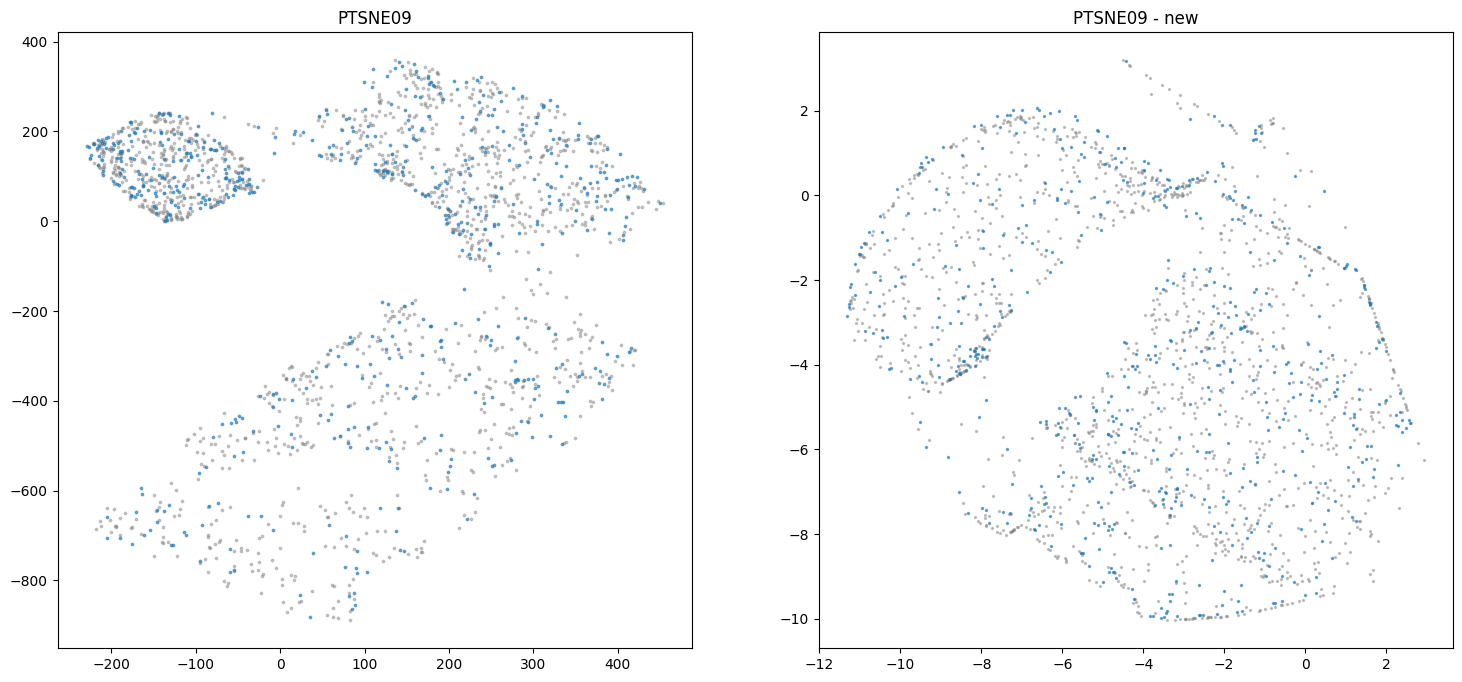

In [2]:
from methods.methods import Methods, _ptsne_new, Parameters
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

X, _ = make_swiss_roll(n_samples=2000, noise=0.1)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

methods = Methods(verbose=True)

m = methods.get('ptsne')
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(121)
ax.scatter(p_train[:, 0], p_train[:, 1], s=3, c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=3, alpha=0.6)
ax.set_title('PTSNE09')

m = _ptsne_new(Parameters(), verbose=True)
m.fit(X_train)
p_train = m.transform(X_train)
p_test = m.transform_oos(X_test)

ax = fig.add_subplot(122)
ax.scatter(p_train[:, 0], p_train[:, 1], s=2,  c='gray', alpha=0.4)
ax.scatter(p_test[:, 0], p_test[:, 1], s=2, alpha=0.6)
ax.set_title('PTSNE09 - new')